<a href="https://colab.research.google.com/github/edcalderin/DeepLearning_SaturdaysAI/blob/master/Extras/1_pytorch_y_gpu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch y la GPU

# Tensores
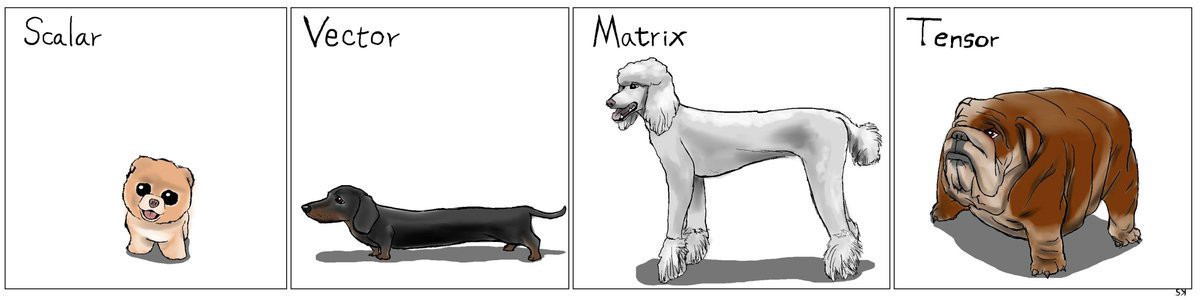

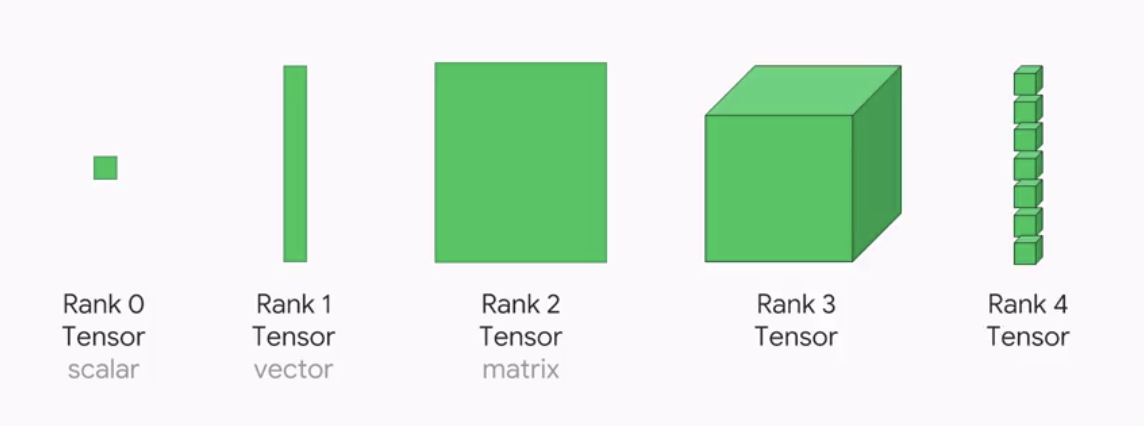

Los tensores son arrays multidimensionales, estos pueden ser asignados en la CPU ó GPU para acelerar las operaciones.

In [1]:
import torch

In [2]:
# Iniciando con FloatTensors
ten_1 = torch.tensor(2)
ten_2 = torch.tensor(5)

In [3]:
print(ten_1 + ten_2)

tensor(7)


In [4]:
print(ten_1 - ten_2)

tensor(-3)


In [5]:
print(ten_1 * ten_2)

tensor(10)


In [6]:
print(ten_1 / ten_2)

tensor(0.4000)


# Matrices en tensores

In [7]:
tensor_ones = torch.ones((3,3))
print(tensor_ones)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


In [8]:
tensor_rand = torch.rand((3,3))
print(tensor_rand)

tensor([[0.9510, 0.7296, 0.5473],
        [0.0989, 0.7754, 0.6722],
        [0.3202, 0.7502, 0.9202]])


# GPU
Si queremos "pasar" a la GPU podemos hacerlo con:
<br>
* cuda()
* to('cuda')

Si queremos "pasar" a la CPU podemos hacerlo con:
<br>
* cpu()
* to('cpu')

In [10]:
torch.cuda.is_available()

True

In [11]:
torch.cuda.get_device_name(0)

'Tesla T4'

¿Qué tan veloz es?

In [ ]:
lis_1 = torch.randn(9000, 9000)
lis_2 = torch.randn(9000, 9000)

In [ ]:
%time calc = lis_1 * lis_2

In [ ]:
lis_1 = torch.randn(9000, 9000).cuda()
lis_2 = torch.randn(9000, 9000).cuda()

In [ ]:
%time calc = lis_1 * lis_2

### Pasando tensores a la GPU

In [ ]:
device = torch.device("cuda")

In [ ]:
x = torch.randn(100)

In [ ]:
x = x.cuda()

In [ ]:
x = x.to(device)

In [ ]:
x = x.to("cuda")

### A tomar en cuenta que...

In [ ]:
mat_1 = torch.tensor([[5,4],[8,9]])
mat_2 = torch.tensor([[5,4],[8,9]])

In [ ]:
mat_1.device

In [ ]:
mat_2.device

In [ ]:
mat_1 = mat_1.to('cuda')

In [ ]:
mat_1.device

In [ ]:
mat_1 + mat_2

In [ ]:
mat_2 = mat_2.to('cuda')

In [ ]:
mat_1 + mat_2

# Autograd
* Ayuda con la diferenciación automática
* Calcula las gradientes

In [12]:
x = torch.tensor(1.0, requires_grad = True)

In [13]:
y = x**2

In [14]:
y.backward()

In [15]:
print(x.grad.data)

tensor(2.)


# Computation Graph
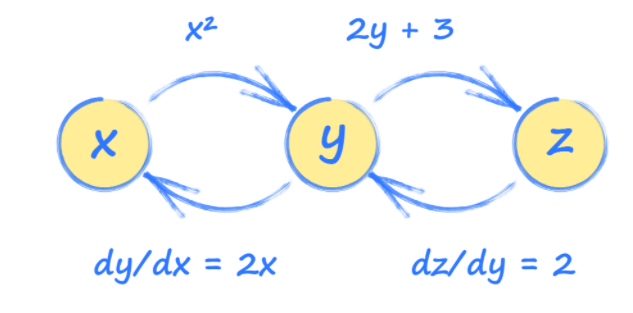

In [16]:
import torch 
x = torch.tensor(1.0, requires_grad = True)
y = x**2
z = 2*y + 3

In [17]:
print(x)
print(y)
print(z)

tensor(1., requires_grad=True)
tensor(1., grad_fn=<PowBackward0>)
tensor(5., grad_fn=<AddBackward0>)


In [18]:
z.backward()

In [19]:
x.grad

tensor(4.)

## Ejercicio
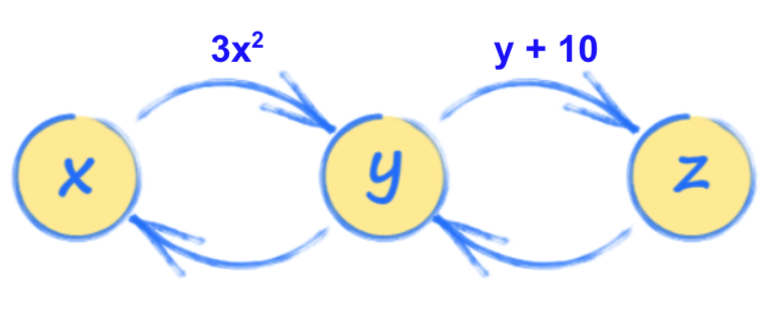

In [20]:
x = torch.tensor(1.0, requires_grad = True)
y = 3*x**2
z = y + 10

In [21]:
print(x)
print(y)
print(z)

tensor(1., requires_grad=True)
tensor(3., grad_fn=<MulBackward0>)
tensor(13., grad_fn=<AddBackward0>)


In [22]:
z.backward()

In [23]:
x.grad

tensor(6.)

# Multi-path computation graph

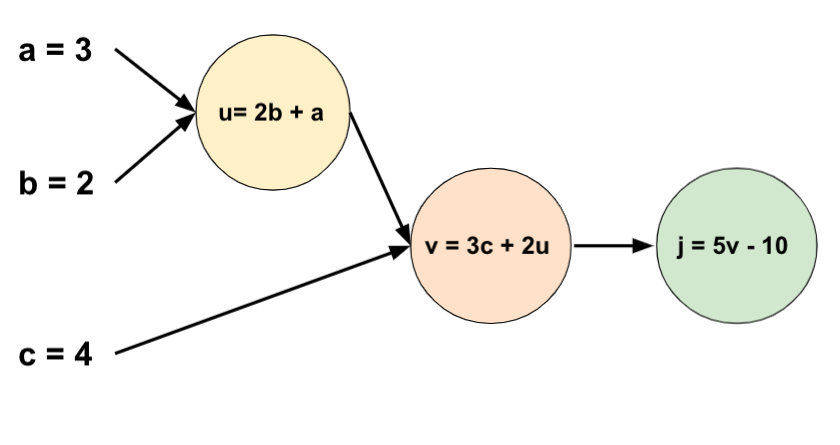

In [ ]:
a = torch.tensor(3.0, requires_grad = True)
b = torch.tensor(2.0, requires_grad = True)
c = torch.tensor(4.0, requires_grad = True)

In [ ]:
u = 2*b + a

In [ ]:
v = 3*c + 2*u

In [ ]:
j = 5*v - 10

In [ ]:
j.backward()

In [ ]:
a.grad

In [ ]:
b.grad

In [ ]:
c.grad

## Ejercicio

In [24]:
a = torch.tensor(2.0, requires_grad = True)
b = torch.tensor(8.0, requires_grad = True)
c = torch.tensor(5.0, requires_grad = True)

In [26]:
u = b**2 + 3*c
v = 5*u - 3*a
j = 10*v + 1

In [27]:
j.backward()

In [29]:
print('a.grad', a.grad)
print('b.grad', b.grad)
print('c.grad', c.grad)

a.grad tensor(-30.)
b.grad tensor(800.)
c.grad tensor(150.)
